# LCPB 22-23 Exercise 4 (XGBoost) 



<center><h1>Group 2307</h1></center>


<center><style>
table {
    font-size: 24px;
}
</style></center>

| Last Name          | First Name            |Matricola number|
|--------------------|-----------------------|----------------|
| Bertinelli         | Gabriele              |1219907 (tri)   |
| Cacciola           | Martina               |2097476         |
| Pervysheva         | Yelyzaveta            |2039398         |           
| Waththe Liyanage   | Wageesha Widuranga    |2078719         |



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['font.size'] = 14

In [45]:
# XGBoost 
imp
import xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, to_graphviz, plot_tree
from sklearn.metrics import mean_squared_error
print("XGBoost version:",xgboost.__version__)


XGBoost version: 1.4.2


In [109]:
import keras, sklearn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [110]:
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2, rmsprop_v2, nadam_v2, adamax_v2
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

In [58]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
warnings.filterwarnings("ignore")


In [139]:
np.random.seed(123)

CASE = 1

S = 2
N = 2000
N_train = 1000
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
    if CASE==1:
        if x[n,1]<-0.6 and x[n,0]>-0.2: y[n]=1
        if x[n,1]>0.4 and x[n,0]<-0.8: y[n]=1
        if x[n,1]>1.0 and x[n,0]>0.8: y[n]=1
    elif CASE==2:
        if x[n,1]<0 and x[n,0]>0.5: y[n]=1
        if x[n,1]>0 and np.sqrt((x[n,0]+0.3)**2+x[n,1]**2)<1.5: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 0
[ 0.87787588 -0.30757416] 0
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


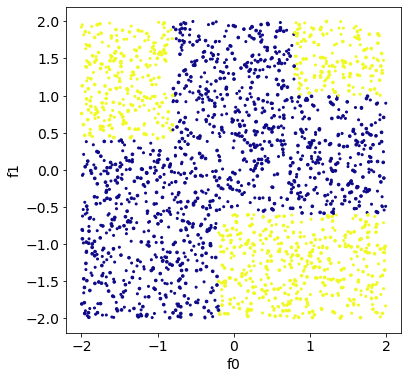

In [140]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="plasma",s=7)
plt.show()

In [141]:
def classify(clf=XGBClassifier(),show=False, use_label_encoder=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        #fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

errors: 0.20%


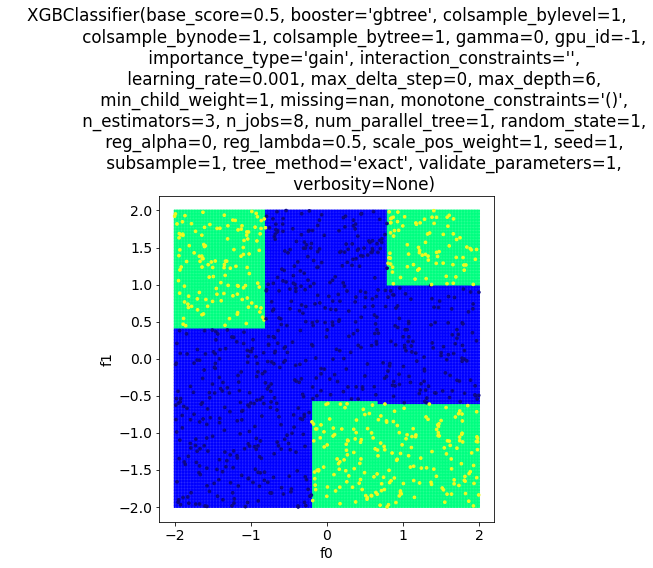

In [147]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.001,
                       reg_lambda=0.5, n_estimators=3),show=False)

In [143]:
def fit(xgbr=XGBClassifier(),show=False, verbosity = 0):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    xgbr.fit(x_train,y_train)
    y_hat = xgbr.predict(x_test)
    print("errors: {:.2f}%".format(100*(1-xgbr.score(x_test, y_test))))
    if show: 
        dx = 0.02
        x_seq=np.arange(-S,S+dx,dx)
        nx = len(x_seq)
        x_plot=np.zeros((nx*nx,2))
        q=0
        for i in range(nx):
            for j in range(nx):
                x_plot[q,:] = [x_seq[i],x_seq[j]]
                q+=1
        y_plot= xgbr.predict(x_plot)

        plt.figure(figsize=(9.5,8))
        plt.title(str(xgbr))
        scat(x_plot,y_plot,cmap="winter",s=0.2)
        plt.colorbar()
        scat(x_train,y_train,s=7)
        plt.show()
    if show:      
        dump_list = xgbr.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(xgbr, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-fit.png", dpi=300, pad_inches=0.02)   
        plt.show()
        #plt.savefig("net"+str(t)+".png",dpi=300)
        plt.show()

In [144]:
lam=[100.,30.,20.,8.,5.,4.2, 4.1, 3.7, 3.8,1.,0.5,0.1]
for l in lam:
    print("lambda=",l)
    fit(XGBClassifier(seed=1,reg_lambda=l, max_depth=3, verbosity = 0), show=False)
    

lambda= 100.0
errors: 0.30%
lambda= 30.0
errors: 0.80%
lambda= 20.0
errors: 0.30%
lambda= 8.0
errors: 0.80%
lambda= 5.0
errors: 0.80%
lambda= 4.2
errors: 0.80%
lambda= 4.1
errors: 0.80%
lambda= 3.7
errors: 0.80%
lambda= 3.8
errors: 0.80%
lambda= 1.0
errors: 0.80%
lambda= 0.5
errors: 0.80%
lambda= 0.1
errors: 0.80%


In [145]:
gam=[0.1,1.,2.,4.,10.,20.,40.,100.,200.]
for g in gam:
    print("gamma=",g)
    fit(XGBClassifier(seed=1, reg_lambda=20., gamma=g,  max_depth=3, verbosity = 0))

gamma= 0.1
errors: 0.30%
gamma= 1.0
errors: 0.30%
gamma= 2.0
errors: 0.30%
gamma= 4.0
errors: 0.30%
gamma= 10.0
errors: 0.40%
gamma= 20.0
errors: 1.30%
gamma= 40.0
errors: 1.30%
gamma= 100.0
errors: 12.20%
gamma= 200.0
errors: 41.10%


In [146]:
trees=[1,2,3,10,50,100,500,1000]
for t in trees:
    print("n_est=",t)
    fit(XGBClassifier(seed=1, reg_lambda=1., gamma=200., n_estimators=t, max_depth=4, verbosity = 0))

n_est= 1
errors: 24.00%
n_est= 2
errors: 8.30%
n_est= 3
errors: 8.30%
n_est= 10
errors: 8.30%
n_est= 50
errors: 8.30%
n_est= 100
errors: 8.30%
n_est= 500
errors: 8.30%
n_est= 1000
errors: 8.30%


errors: 8.30%


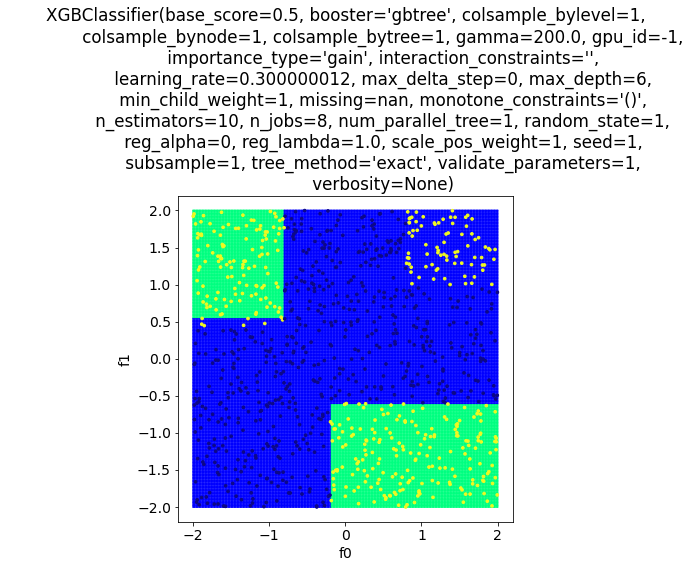

In [148]:
classify(XGBClassifier(seed=1,
                       objective='binary:logistic',
                       #objective="reg:squarederror",eval_metric="rmse",
                       
                       reg_lambda=1., n_estimators=10, gamma=200.),show=False)

## Task 1

### DNN

In [126]:
def Rescaling(x):
    X = x/S
    return X

x_train = Rescaling(x_train)
x_test = Rescaling(x_test)

In [133]:
# Creating and training the NN model w/ our best parameters
best_activation = "relu"
best_optimizer = adam_v2.Adam()
best_batch_size = 128
best_dropout_rate = 0.3

epochs = 450

best_model = Sequential() 

activation = best_activation
best_model.add(Dense(L, input_shape=(L,), activation=activation))
best_model.add(Dense(20, activation=activation))  
best_model.add(Dense(20, activation=activation))

dropout_rate = best_dropout_rate
best_model.add(Dropout(dropout_rate))
best_model.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer

best_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size


# Fitting again with more data
fit = best_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=False)

The best validation accuracy is 0.810
The error score is 0.190


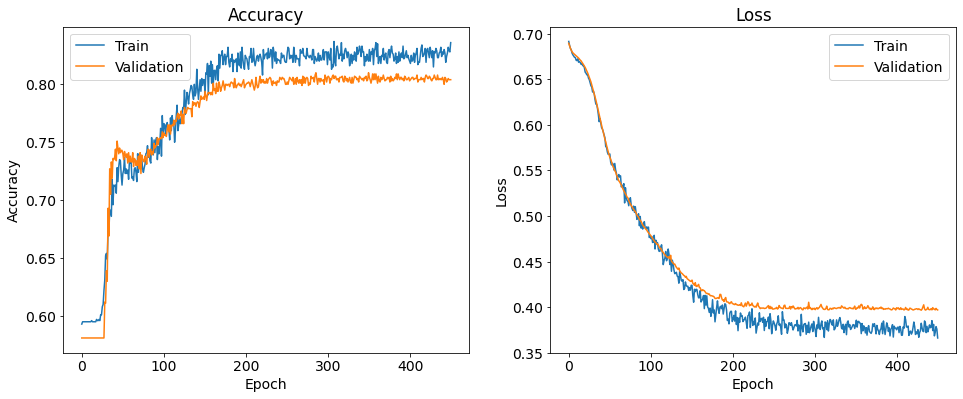

In [138]:
# Printing the max validation accuracy value
max_val_acc = np.max(fit.history['val_accuracy'])
print('The best validation accuracy is %.3f' %(max_val_acc))
print('The error score is %.3f' %(1-np.max(fit.history['val_accuracy'])))

# Creating the plot
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Accuracy in training and validation
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])

# Setting labels and legend
ax1.set_title('Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])

# Loss in training and validation
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])

# Setting labels and legend
ax2.set_title('Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'])

plt.show()